In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('smsspamcollection.csv')
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
df.shape

(5572, 2)

## DATA CLEANING

In [4]:
df.isna().sum()

label      0
message    0
dtype: int64

In [5]:
df['label'] = df['label'].map({
    'ham':0,
    'spam':1
})

In [6]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.duplicated().sum()

403

In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
df.shape

(5169, 2)

## EDA

In [10]:
df.label.value_counts()

label
0    4516
1     653
Name: count, dtype: int64

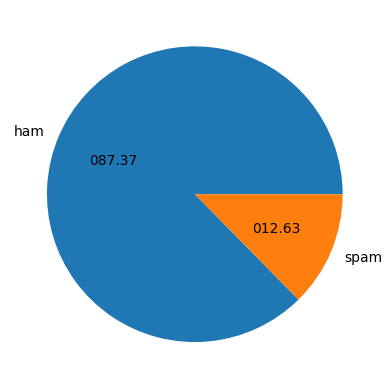

In [11]:
import matplotlib.pyplot as plt

plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="0%.2f")
plt.show()


In [12]:
df['numeric_chars']=df['message'].apply(len)

In [13]:
df.head()

,label,message,numeric_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [15]:
df['numeric_words']=df['message'].apply(lambda x : len(word_tokenize(x)))

In [16]:
df.head()

,label,message,numeric_chars,numeric_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [17]:
df['numeric_sents']=df['message'].apply(lambda x : len(sent_tokenize(x)))

In [18]:
df.head(5)

,label,message,numeric_chars,numeric_words,numeric_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df[['numeric_chars','numeric_words','numeric_sents']].describe()

,numeric_chars,numeric_words,numeric_sents
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
df[df['label']==0][['numeric_chars','numeric_words','numeric_sents']].describe()

,numeric_chars,numeric_words,numeric_sents
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
df[df['label']==1][['numeric_chars','numeric_words','numeric_sents']].describe()

,numeric_chars,numeric_words,numeric_sents
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [22]:
import seaborn as sns
# nums = ['numeric_chars','numeric_words','numeric_sents']
# for i in nums:
#     plt.figure(figsize=(10,8))
#     sns.histplot(df[df['label']==0][i],color='blue')
#     sns.histplot(df[df['label']==1][i],color='red')
#     plt.show()

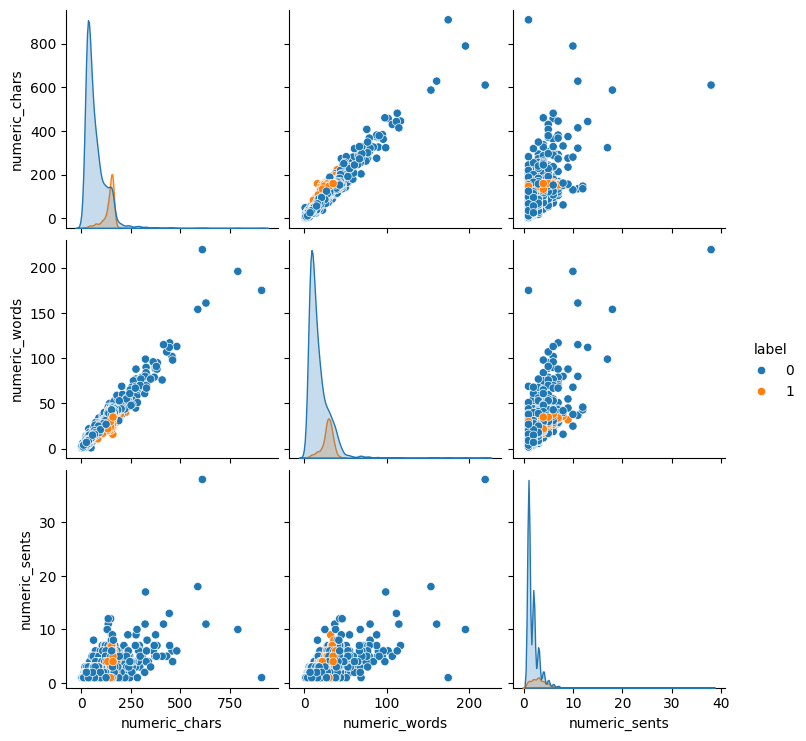

In [23]:
sns.pairplot(df,hue='label')
plt.show()

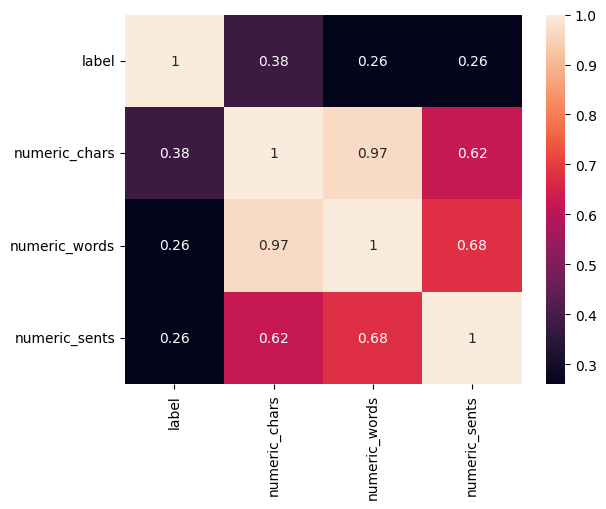

In [24]:
sns.heatmap(df[['label','numeric_chars','numeric_words','numeric_sents']].corr(),annot=True)
plt.show()

## DATA PRE-PROCESSING

In [25]:
df.head()

,label,message,numeric_chars,numeric_words,numeric_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df['message']=df['message'].str.lower()

In [27]:
df.head()

,label,message,numeric_chars,numeric_words,numeric_sents
0,0,"go until jurong point, crazy.. available only ...",111,24,2
1,0,ok lar... joking wif u oni...,29,8,2
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2
3,0,u dun say so early hor... u c already then say...,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1


In [28]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


def transformtext(text):

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word.isalnum()]

    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]

    lemmatized = [lemmatizer.lemmatize(word.lower()) for word in tokens]

    return " ".join(lemmatized)


In [29]:
transformtext("Hi how are you saket? did you like my presentation on ml")

'hi saket like presentation ml'

In [30]:
df['transformed_text']=df['message'].apply(transformtext)

In [31]:
df.head()

,label,message,numeric_chars,numeric_words,numeric_sents,transformed_text
0,0,"go until jurong point, crazy.. available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,ok lar... joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say so early hor... u c already then say...,49,13,1,u dun say early hor u c already say
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [32]:
from wordcloud import WordCloud
wc=WordCloud(width =500,height=500,min_font_size=10,background_color='white')


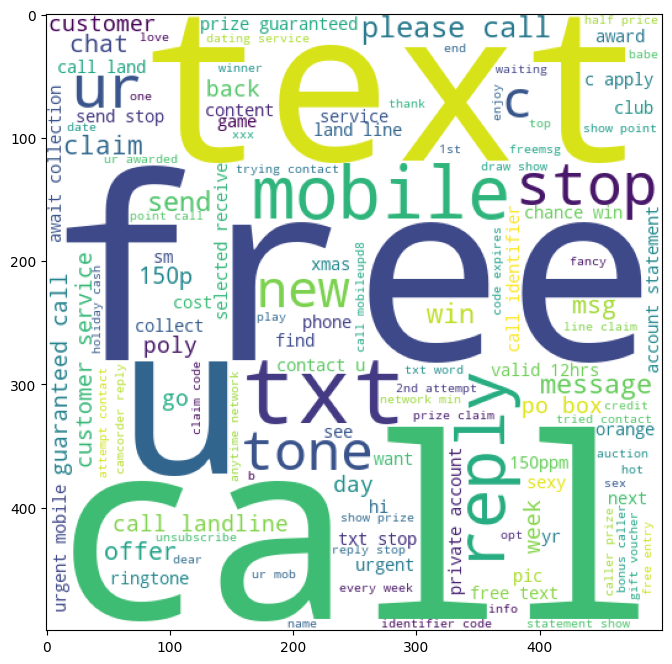

In [33]:
spam_wc = wc.generate(df[df.label == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.imshow(spam_wc)

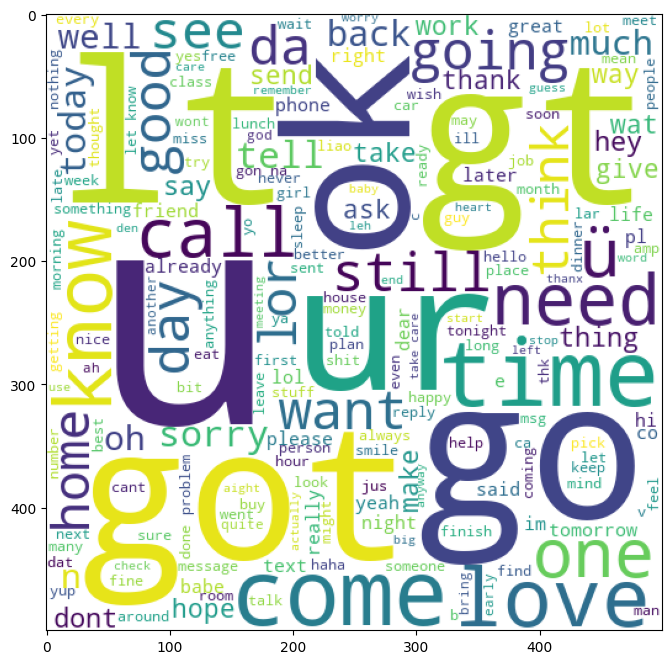

In [34]:
ham_wc = wc.generate(df[df.label == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.imshow(spam_wc)

In [35]:
spam_corpus=[]

for msg in df[df['label']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [36]:
len(spam_corpus)

9982

In [37]:
from collections import Counter 
Counter(spam_corpus).most_common(30)

[('call', 313),
 ('free', 191),
 ('2', 155),
 ('txt', 130),
 ('u', 127),
 ('text', 121),
 ('ur', 119),
 ('mobile', 114),
 ('stop', 108),
 ('claim', 98),
 ('reply', 97),
 ('4', 97),
 ('prize', 82),
 ('c', 80),
 ('get', 70),
 ('new', 64),
 ('service', 64),
 ('tone', 63),
 ('send', 59),
 ('urgent', 58),
 ('nokia', 54),
 ('phone', 52),
 ('cash', 51),
 ('contact', 51),
 ('week', 49),
 ('please', 49),
 ('win', 48),
 ('min', 45),
 ('customer', 42),
 ('guaranteed', 42)]

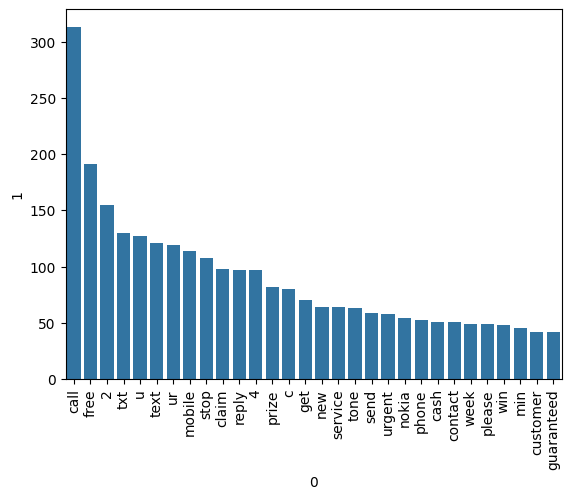

In [38]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [39]:
ham_corpus=[]

for msg in df[df['label']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [40]:
len(ham_corpus)

35939

In [41]:
from collections import Counter 
Counter(ham_corpus).most_common(30)

[('u', 949),
 ('get', 305),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('go', 269),
 ('got', 239),
 ('know', 234),
 ('come', 229),
 ('like', 226),
 ('ok', 218),
 ('good', 215),
 ('time', 214),
 ('ur', 203),
 ('call', 196),
 ('day', 195),
 ('love', 184),
 ('want', 180),
 ('ü', 173),
 ('need', 167),
 ('one', 166),
 ('going', 164),
 ('4', 162),
 ('lor', 159),
 ('home', 152),
 ('still', 144),
 ('da', 142),
 ('see', 136),
 ('think', 130),
 ('r', 128)]

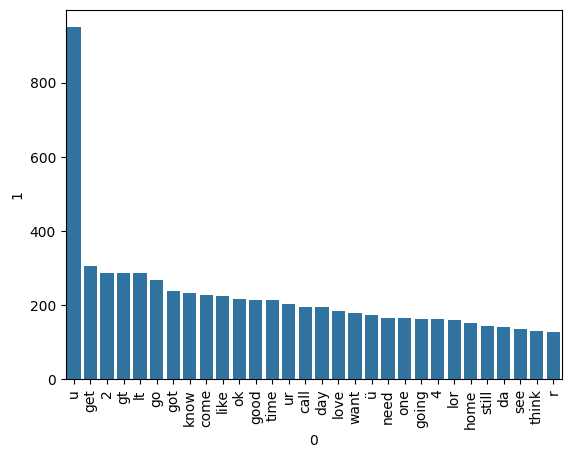

In [42]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## MODEL BUILDING

In [77]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [78]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25, random_state=42, shuffle=True)

In [79]:
X_train = df_train['transformed_text']
X_test = df_test['transformed_text']

y_train = df_train['label']
y_test = df_test['label']

In [80]:
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()

X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [81]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train)

y_pred_mnb = mnb.predict(X_test_cv)
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print(classification_report(y_test, y_pred_mnb))


Accuracy: 0.9752513534416086
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1124
           1       0.92      0.89      0.90       169

    accuracy                           0.98      1293
   macro avg       0.95      0.94      0.94      1293
weighted avg       0.98      0.98      0.98      1293



In [82]:
gnb = GaussianNB()
gnb.fit(X_train_cv, y_train)

y_pred_gnb = gnb.predict(X_test_cv)
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

Accuracy: 0.8878576952822892
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1124
           1       0.54      0.88      0.67       169

    accuracy                           0.89      1293
   macro avg       0.76      0.88      0.80      1293
weighted avg       0.92      0.89      0.90      1293



In [83]:
bnb = BernoulliNB()
bnb.fit(X_train_cv, y_train)

y_pred_bnb = bnb.predict(X_test_cv)
print("Accuracy:", accuracy_score(y_test, y_pred_bnb))
print(classification_report(y_test, y_pred_bnb))

Accuracy: 0.9698375870069605
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1124
           1       1.00      0.77      0.87       169

    accuracy                           0.97      1293
   macro avg       0.98      0.88      0.93      1293
weighted avg       0.97      0.97      0.97      1293



In [84]:
mnb2 = MultinomialNB()
mnb2.fit(X_train_tfidf, y_train)

y_pred_mnb2 = mnb2.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_mnb2))
print(classification_report(y_test, y_pred_mnb2))

Accuracy: 0.9767981438515081
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1124
           1       1.00      0.82      0.90       169

    accuracy                           0.98      1293
   macro avg       0.99      0.91      0.94      1293
weighted avg       0.98      0.98      0.98      1293



In [85]:
gnb2 = GaussianNB()
gnb2.fit(X_train_tfidf, y_train)

y_pred_gnb2 = gnb2.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_gnb2))
print(classification_report(y_test, y_pred_gnb2))

Accuracy: 0.8692962103634957
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1124
           1       0.50      0.89      0.64       169

    accuracy                           0.87      1293
   macro avg       0.74      0.88      0.78      1293
weighted avg       0.92      0.87      0.88      1293



In [86]:
bnb2 = BernoulliNB()
bnb2.fit(X_train_tfidf, y_train)

y_pred_bnb2 = bnb2.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_bnb2))
print(classification_report(y_test, y_pred_bnb2))

Accuracy: 0.9837587006960556
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1124
           1       1.00      0.88      0.93       169

    accuracy                           0.98      1293
   macro avg       0.99      0.94      0.96      1293
weighted avg       0.98      0.98      0.98      1293

